In [80]:
import pandas as pd
import matplotlib.pyplot as plt

### Get strings from *.out files

In [81]:
str_serial_cpu = """
NUM_THREADS 1
Total time: 2109.163477
DGEMM time: 615.427940
DGEMM_TA time: 1082.785237
DGEMM_TB time: 395.600648
"""
str_openMP = """
NUM_THREADS 1
Total time: 930.083747
DGEMM time: 221.549814
DGEMM_TA time: 288.940077
DGEMM_TB time: 407.106911
NUM_THREADS 2
Total time: 489.206177
DGEMM time: 114.959733
DGEMM_TA time: 150.136617
DGEMM_TB time: 210.204105
NUM_THREADS 4
Total time: 254.719743
DGEMM time: 58.205771
DGEMM_TA time: 76.296038
DGEMM_TB time: 105.871879
NUM_THREADS 6
Total time: 179.416271
DGEMM time: 40.549888
DGEMM_TA time: 51.345863
DGEMM_TB time: 72.867543
NUM_THREADS 8
Total time: 157.668852
DGEMM time: 31.806001
DGEMM_TA time: 44.074595
DGEMM_TB time: 61.635841
NUM_THREADS 12
Total time: 121.995781
DGEMM time: 23.272130
DGEMM_TA time: 30.776521
DGEMM_TB time: 46.153299
NUM_THREADS 24
Total time: 118.074446
DGEMM time: 22.433381
DGEMM_TA time: 28.016282
DGEMM_TB time: 42.538088
"""
#ikj implementation of openMP
str_openMP_alt = """NUM_THREADS 1
Total time: 1407.049668
DGEMM time: 220.721930
DGEMM_TA time: 287.643391
DGEMM_TB time: 886.072098
NUM_THREADS 2
Total time: 792.094671
DGEMM time: 115.811752
DGEMM_TA time: 150.843490
DGEMM_TB time: 511.435451
NUM_THREADS 4
Total time: 455.331416
DGEMM time: 58.394906
DGEMM_TA time: 76.048337
DGEMM_TB time: 306.370375
NUM_THREADS 6
Total time: 413.383479
DGEMM time: 41.423448
DGEMM_TA time: 52.471427
DGEMM_TB time: 304.477641
NUM_THREADS 8
Total time: 344.497886
DGEMM time: 34.421160
DGEMM_TA time: 44.863642
DGEMM_TB time: 245.307657
NUM_THREADS 12
Total time: 294.298273
DGEMM time: 34.395004
DGEMM_TA time: 46.961150
DGEMM_TB time: 190.679914
NUM_THREADS 24
Total time: 825.567992
DGEMM time: 75.240661
DGEMM_TA time: 120.031324
DGEMM_TB time: 601.713403
"""
str_openMP_init = """
NUM_THREADS 1
Total time: 2389.605027
DGEMM time: 698.513410
DGEMM_TA time: 1219.612302
DGEMM_TB time: 454.018667
NUM_THREADS 2
Total time: 1241.076092
DGEMM time: 365.092096
DGEMM_TA time: 629.080291
DGEMM_TB time: 229.500489
NUM_THREADS 4
Total time: 706.399519
DGEMM time: 246.926038
DGEMM_TA time: 326.962214
DGEMM_TB time: 114.910493
NUM_THREADS 6
Total time: 568.297002
DGEMM time: 245.698081
DGEMM_TA time: 225.308141
DGEMM_TB time: 78.794913
NUM_THREADS 12
Total time: 338.202612
DGEMM time: 131.799609
DGEMM_TA time: 132.656399
DGEMM_TB time: 48.442846
NUM_THREADS 24
Total time: 485.454411
DGEMM time: 266.227181
DGEMM_TA time: 146.688481
DGEMM_TB time: 44.113859
"""

str_openBlas = """NUM_THREADS 1
Total time: 266.610005
DGEMM time: 72.529056
DGEMM_TA time: 90.951139
DGEMM_TB time: 86.076402
NUM_THREADS 2
Total time: 151.375221
DGEMM time: 37.960390
DGEMM_TA time: 48.251056
DGEMM_TB time: 45.791626
NUM_THREADS 4
Total time: 93.144344
DGEMM time: 20.120209
DGEMM_TA time: 26.727089
DGEMM_TB time: 25.405505
NUM_THREADS 6
Total time: 82.909821
DGEMM time: 17.773748
DGEMM_TA time: 19.457181
DGEMM_TB time: 22.909957
NUM_THREADS 12
Total time: 90.429219
DGEMM time: 18.832622
DGEMM_TA time: 22.251694
DGEMM_TB time: 24.532947
NUM_THREADS 24
Total time: 72.580011
DGEMM time: 11.171802
DGEMM_TA time: 15.804974
DGEMM_TB time: 15.235417
"""
# CUDA RUNS ON GOLD2
str_cuda_naive = """
NUM THREADS 1
Total time: 119.940744
DGEMM time: 36.084327
DGEMM_TA time: 31.575123
DGEMM_TB time: 28.437693
"""
str_cuda_shared = """
NUM THREADS 1
Total time: 121.694454
DGEMM time: 36.985767
DGEMM_TA time: 31.771800
DGEMM_TB time: 28.247138
"""
str_cublas = """
NUM THREADS 1
Total time: 121.184733
DGEMM time: 36.032372
DGEMM_TA time: 31.417084
DGEMM_TB time: 28.502271
"""

# ##CUDA RUNS ON DUNGANI
# str_cuda_naive = """
# NUM THREADS 1
# Total time: 742.148794
# DGEMM time: 513.153101
# DGEMM_TA time: 154.974641
# DGEMM_TB time: 57.701005
# """

# str_cuda_shared = """"""

# str_cublas = """"""

SECOND RUN CUDA (GOLD2)

In [82]:
# str_shared___ = """
# Total time: 118.608842
# DGEMM time: 36.349858
# DGEMM_TA time: 31.589292
# DGEMM_TB time: 27.248801
# """
# str_naive___ = """
# Total time: 119.471707
# DGEMM time: 36.009051
# DGEMM_TA time: 31.557396
# DGEMM_TB time: 28.423370
# """
# str_cublas__ = """
# Total time: 123.751051
# DGEMM time: 37.303618
# DGEMM_TA time: 32.956467
# DGEMM_TB time: 28.614398
# """

In [110]:
def string_parser(x):
    nums = [float(s) for s in x.split() if s.replace('.','',1).isdigit()]
    threads = [int(l) for i,l in enumerate(nums) if (i)%5==0]
    total = [l for i,l in enumerate(nums) if (i-1)%5==0]
    dgemm = [l for i,l in enumerate(nums) if (i-2)%5==0]
    dgemm_ta = [l for i,l in enumerate(nums) if (i-3)%5==0]
    dgemm_tb = [l for i,l in enumerate(nums) if (i-4)%5==0]
    return pd.DataFrame(list(zip(total,dgemm,dgemm_ta,dgemm_tb)),index=threads,columns=['total','dgemm','dgemm_ta','dgemm_tb'])

In [111]:
serial = string_parser(str_serial_cpu)
openMP_init = string_parser(str_openMP_init)
openMP_alt = string_parser(str_openMP_alt)
openMP = string_parser(str_openMP)
openBlas = string_parser(str_openBlas)
cuda_naive = string_parser(str_cuda_naive)
cuda_shared = string_parser(str_cuda_shared)
cublas = string_parser(str_cublas)

In [85]:
totals = [serial.values[0][0]-sum(serial.values.reshape(4)[1:]), 
          openMP_init[openMP_init.index == 12].values[0][0]-sum(openMP_init[openMP_init.index == 12].values.reshape(4)[1:]),
          openMP_alt[openMP_alt.index == 12].values[0][0]-sum(openMP_alt[openMP_alt.index == 12].values.reshape(4)[1:]),
          openMP[openMP.index == 24].values[0][0]-sum(openMP[openMP.index == 24].values.reshape(4)[1:]),
          openBlas[openBlas.index == 12].values[0][0]-sum(openBlas[openBlas.index == 24].values.reshape(4)[1:]),
          cuda_naive.values[0][0]-sum(cuda_naive.values.reshape(4)[1:]),
          cuda_shared.values[0][0]-sum(cuda_shared.values.reshape(4)[1:]),
          cublas.values[0][0]-sum(cublas.values.reshape(4)[1:])]
dgemm =[serial.values[0][1],
        openMP_init[openMP_init.index == 12].values[0][1],
        openMP_alt[openMP_alt.index == 12].values[0][1],
        openMP[openMP.index == 24].values[0][1],
        openBlas[openBlas.index == 24].values[0][1],cuda_naive.values[0][1],
        cuda_shared.values[0][1],
        cublas.values[0][1]]
dgemm_ta =[serial.values[0][2],
           openMP_init[openMP_init.index == 12].values[0][2],
           openMP_alt[openMP_alt.index == 12].values[0][2],
           openMP[openMP.index == 24].values[0][2],
           openBlas[openBlas.index == 24].values[0][2],
           cuda_naive.values[0][2],cuda_shared.values[0][2],
           cublas.values[0][2]]

dgemm_tb =[serial.values[0][3],
           openMP_init[openMP_init.index == 12].values[0][3],
           openMP_alt[openMP_alt.index == 12].values[0][3],
           openMP[openMP.index == 24].values[0][3],
           openBlas[openBlas.index == 24].values[0][3],
           cuda_naive.values[0][3],cuda_shared.values[0][3],
           cublas.values[0][3]]

labels = ['Serial','openMP_init\n(12-threads)','openMP_alt\n(12-threads)' ,'openMP\n(24-threads)','openBlas\n(24-threads)','Cuda Naive','Cuda Shared','cuBLAS']

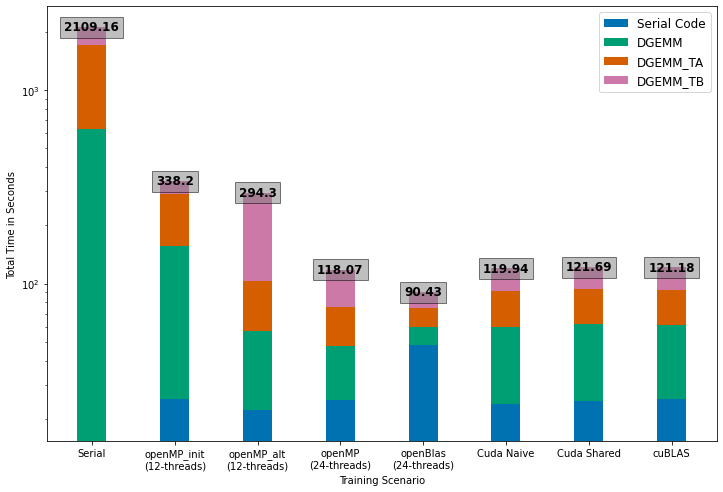

In [106]:
plt.style.use('seaborn-colorblind')
fig,ax = plt.subplots(figsize=(12,8))
width=0.35
ax.bar(labels, totals, width, label='Serial Code')
ax.bar(labels, dgemm, width, label='DGEMM',bottom=totals)
ax.bar(labels, dgemm_ta, width, label='DGEMM_TA',bottom=[sum(x) for x in zip(totals,dgemm)])
ax.bar(labels, dgemm_tb, width, label='DGEMM_TB',bottom=[sum(x) for x in zip(totals,dgemm,dgemm_ta)])
ax.set_yscale('log')
for i, v in enumerate(list(sum(x) for x in zip(totals,dgemm,dgemm_ta,dgemm_tb))):
    ax.text(i , v, str(round(v,2)), color='black', 
            fontweight='bold',fontsize=12,bbox=dict(facecolor='gray', alpha=0.5),
           horizontalalignment='center',
          verticalalignment='center')
plt.xlabel('Training Scenario')
plt.ylabel('Total Time in Seconds')
plt.legend(loc='upper right',fontsize='large')
plt.show()
# fig.savefig('full.png')

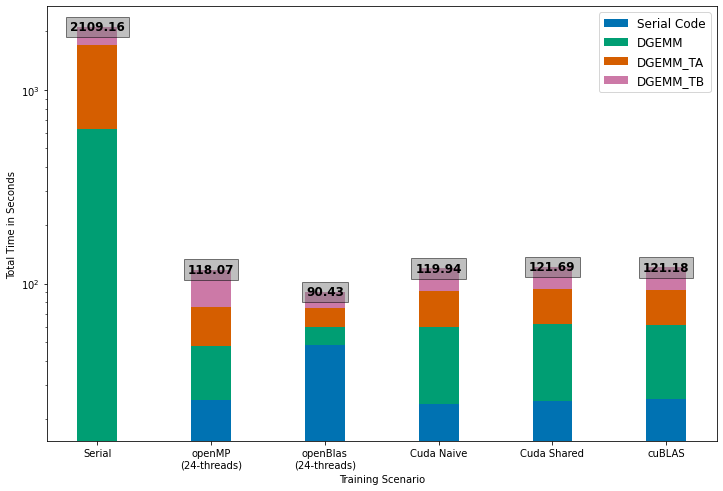

In [105]:
plt.style.use('seaborn-colorblind')
fig,ax = plt.subplots(figsize=(12,8))
width=0.35
labels_2 = labels[0:1]+labels[3:]
totals_2 = totals[0:1]+totals[3:]
dgemm_2 = dgemm[0:1] + dgemm[3:]
dgemm_2_ta = dgemm_ta[0:1] + dgemm_ta[3:]
dgemm_2_tb = dgemm_tb[0:1] + dgemm_tb[3:]
ax.bar(labels_2, totals_2, width, label='Serial Code')
ax.bar(labels_2, dgemm_2, width, label='DGEMM',bottom=totals_2)
ax.bar(labels_2, dgemm_2_ta, width, label='DGEMM_TA',bottom=[sum(x) for x in zip(totals_2,dgemm_2)])
ax.bar(labels_2, dgemm_2_tb, width, label='DGEMM_TB',bottom=[sum(x) for x in zip(totals_2,dgemm_2,dgemm_2_ta)])
for i, v in enumerate(list(sum(x) for x in zip(totals_2,dgemm_2,dgemm_2_ta,dgemm_2_tb))):
    ax.text(i , v, str(round(v,2)), color='black', 
            fontweight='bold',fontsize=12,bbox=dict(facecolor='gray', alpha=0.5),
           horizontalalignment='center',
          verticalalignment='center')
ax.set_yscale('log')
plt.xlabel('Training Scenario')
plt.ylabel('Total Time in Seconds')
plt.legend(loc='upper right',fontsize='large')
plt.show()
# fig.savefig('full2.png')

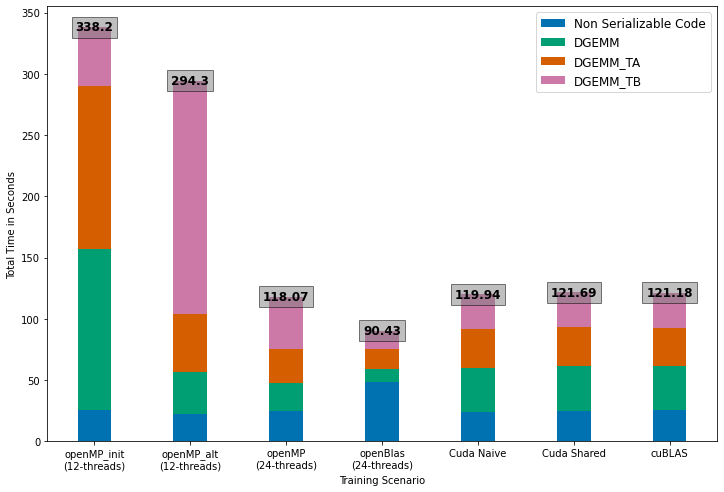

In [88]:
plt.style.use('seaborn-colorblind')
fig,ax = plt.subplots(figsize=(12,8))
width=0.35
labels_2 = labels[1:]
totals_2 = totals[1:]
dgemm_2 = dgemm[1:]
dgemm_2_ta = dgemm_ta[1:]
dgemm_2_tb = dgemm_tb[1:]
ax.bar(labels_2, totals_2, width, label='Non Serializable Code')
ax.bar(labels_2, dgemm_2, width, label='DGEMM',bottom=totals_2)
ax.bar(labels_2, dgemm_2_ta, width, label='DGEMM_TA',bottom=[sum(x) for x in zip(totals_2,dgemm_2)])
ax.bar(labels_2, dgemm_2_tb, width, label='DGEMM_TB',bottom=[sum(x) for x in zip(totals_2,dgemm_2,dgemm_2_ta)])
for i, v in enumerate(list(sum(x) for x in zip(totals_2,dgemm_2,dgemm_2_ta,dgemm_2_tb))):
    ax.text(i , v, str(round(v,2)), color='black', 
            fontweight='bold',fontsize=12,bbox=dict(facecolor='gray', alpha=0.5),
           horizontalalignment='center',
          verticalalignment='center')
# ax.set_yscale('log')
plt.xlabel('Training Scenario')
plt.ylabel('Total Time in Seconds')
plt.legend(loc='upper right',fontsize='large')
plt.show()
# fig.savefig('full2.png')

# CPU Scalability

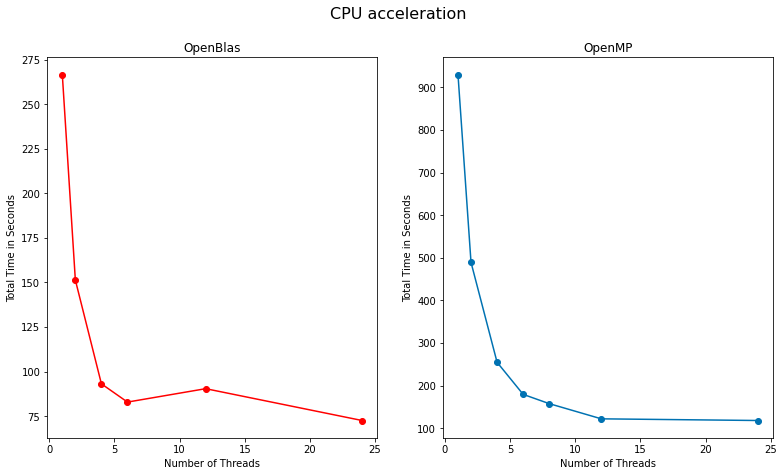

In [89]:
fig, ax = plt.subplots(1,2,sharex=True,figsize=(13,7))
ax[0].plot(openBlas.index, openBlas.total,'r-')
ax[0].scatter(openBlas.index, openBlas.total,c='r')
ax[0].set_title('OpenBlas')
ax[0].set_ylabel('Total Time in Seconds')
ax[1].plot(openMP.index, openMP.total)
ax[1].scatter(openMP.index, openMP.total)
ax[1].set_title('OpenMP')
ax[1].set_ylabel('Total Time in Seconds')
ax[0].set_xlabel('Number of Threads')
ax[1].set_xlabel('Number of Threads')
fig.suptitle('CPU acceleration', fontsize=16)
plt.show()

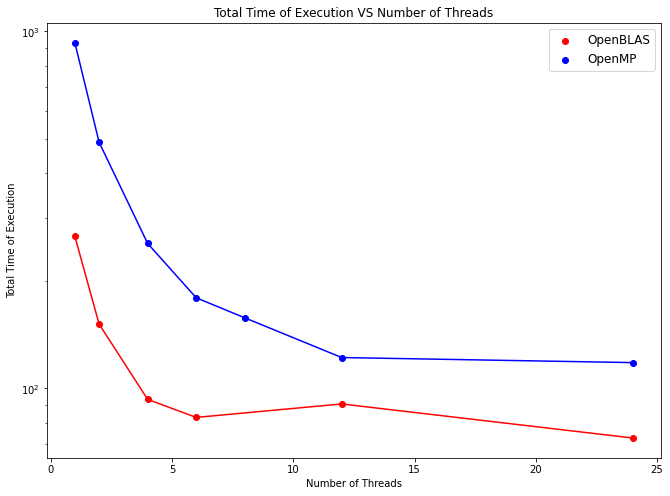

In [90]:
fig, ax = plt.subplots(figsize=(11,8))
ax.scatter(openBlas.index, openBlas.total,c='r',label='OpenBLAS')
ax.scatter(openMP.index, openMP.total,c='b',label='OpenMP')
ax.plot(openBlas.index, openBlas.total,'r-')
ax.plot(openMP.index, openMP.total,'b-')
plt.legend(loc='best',fontsize='large')
plt.yscale('log')
plt.xlabel('Number of Threads')
plt.ylabel('Total Time of Execution')
plt.title('Total Time of Execution VS Number of Threads')
plt.show()
fig.savefig('totalVSthreadslog.png')

In [91]:
openBlas['Blas_speedup'] = serial.total.values[0]/openBlas.total
openMP['OMP_speedup'] = serial.total.values[0]/openMP.total
openMP_init['OMP_speedup'] = serial.total.values[0]/openMP_init.total

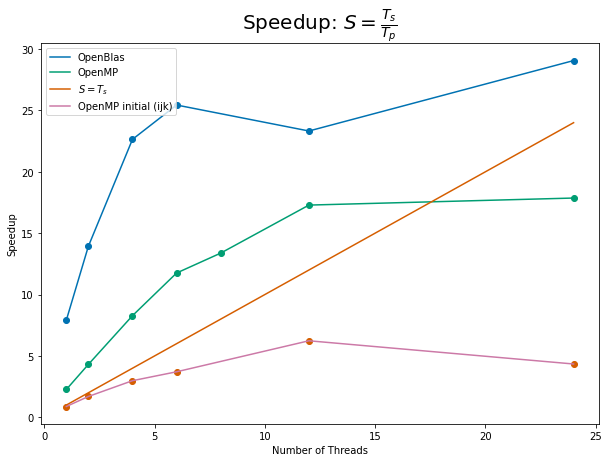

In [92]:
fig = plt.figure(figsize=(10,7))
plt.plot(openBlas.index,openBlas.Blas_speedup,label='OpenBlas')
plt.plot(openMP.index,openMP.OMP_speedup,label='OpenMP')
plt.scatter(openBlas.index,openBlas.Blas_speedup)
plt.scatter(openMP.index,openMP.OMP_speedup)
plt.plot(openMP.index,openMP.index, label=r'$S=T_s$')
plt.plot(openMP_init.index,openMP_init.OMP_speedup,label='OpenMP initial (ijk)')
plt.scatter(openMP_init.index,openMP_init.OMP_speedup)
plt.legend()
plt.title(r'Speedup: $S=\frac{T_s}{T_p}$',fontsize=20)
plt.ylabel('Speedup')
plt.xlabel('Number of Threads')
plt.show()
fig.savefig('speedup.png')

In [93]:
openBlas['speedup2'] = openBlas[openBlas.index == 1].total.values/openBlas.total
openMP['speedup2'] = openMP[openMP.index==1].total.values/openMP.total

#### openMP speedup:

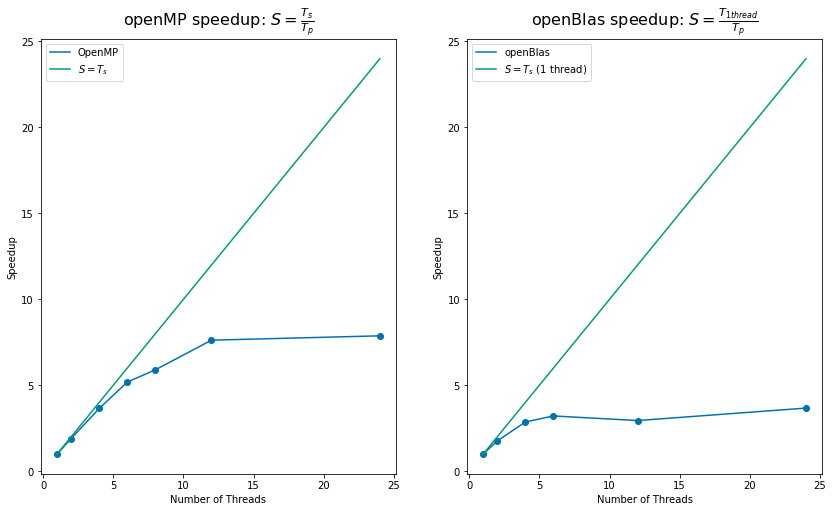

In [94]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
# plt.plot(openBlas.index,openBlas.Blas_speedup,label='OpenBlas')
ax[0].plot(openMP.index,openMP.speedup2,label='OpenMP')
# plt.scatter(openBlas.index,openBlas.Blas_speedup)
ax[0].scatter(openMP.index,openMP.speedup2)
ax[0].plot(openMP.index,openMP.index, label=r'$S=T_s$')
ax[0].legend()
ax[0].set_title(r'openMP speedup: $S=\frac{T_s}{T_p}$',fontsize=16)
ax[0].set_ylabel('Speedup')
ax[0].set_xlabel('Number of Threads')
ax[1].plot(openBlas.index,openBlas.speedup2,label='openBlas')
ax[1].scatter(openBlas.index,openBlas.speedup2)
ax[1].plot(openBlas.index,openBlas.index, label=r'$S=T_s$ (1 thread)')
ax[1].legend()
ax[1].set_title(r'openBlas speedup: $S=\frac{T_{1 thread}}{T_p}$',fontsize=16)
ax[1].set_ylabel('Speedup')
ax[1].set_xlabel('Number of Threads')
fig.savefig('speedups.png')

#### openBlas speedup:

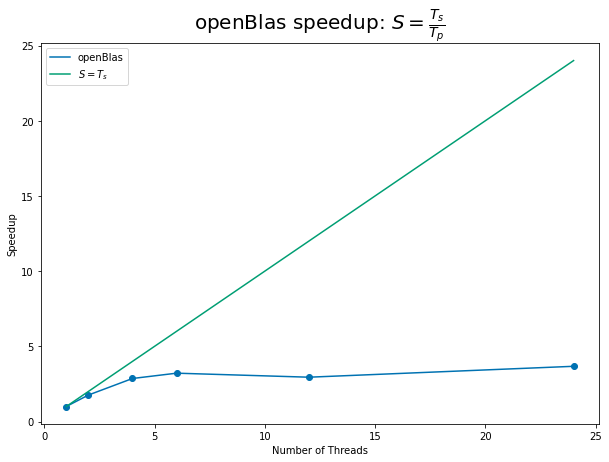

In [95]:
fig = plt.figure(figsize=(10,7))
# plt.plot(openBlas.index,openBlas.Blas_speedup,label='OpenBlas')
plt.plot(openBlas.index,openBlas.speedup2,label='openBlas')
# plt.scatter(openBlas.index,openBlas.Blas_speedup)
plt.scatter(openBlas.index,openBlas.speedup2)
plt.plot(openBlas.index,openBlas.index, label=r'$S=T_s$')
plt.legend()
plt.title(r'openBlas speedup: $S=\frac{T_s}{T_p}$',fontsize=20)
plt.ylabel('Speedup')
plt.xlabel('Number of Threads')
plt.show()

#### Difference between 2 different OMP implementations

In [152]:
openMP_init['serial'] = openMP_init.total-openMP_init.dgemm - openMP_init.dgemm_ta - openMP_init.dgemm_tb
openMP_alt['serial'] = openMP_alt.total-openMP_alt.dgemm - openMP_alt.dgemm_ta - openMP_alt.dgemm_tb
openMP['serial'] = openMP.total-openMP.dgemm - openMP.dgemm_ta - openMP.dgemm_tb

In [157]:
openMP

,total,dgemm,dgemm_ta,dgemm_tb,serial
1,930.083747,221.549814,288.940077,407.106911,12.486945
2,489.206177,114.959733,150.136617,210.204105,13.905722
4,254.719743,58.205771,76.296038,105.871879,14.346055
6,179.416271,40.549888,51.345863,72.867543,14.652977
8,157.668852,31.806001,44.074595,61.635841,20.152415
12,121.995781,23.272130,30.776521,46.153299,21.793831
24,118.074446,22.433381,28.016282,42.538088,25.086695


In [158]:
openMP_init

,total,dgemm,dgemm_ta,dgemm_tb,serial
1,2389.605027,698.513410,1219.612302,454.018667,17.460648
2,1241.076092,365.092096,629.080291,229.500489,17.403216
4,706.399519,246.926038,326.962214,114.910493,17.600774
6,568.297002,245.698081,225.308141,78.794913,18.495867
12,338.202612,131.799609,132.656399,48.442846,25.303758
24,485.454411,266.227181,146.688481,44.113859,28.424890


In [159]:
openMP_alt

,total,dgemm,dgemm_ta,dgemm_tb,serial
1,1407.049668,220.721930,287.643391,886.072098,12.612249
2,792.094671,115.811752,150.843490,511.435451,14.003978
4,455.331416,58.394906,76.048337,306.370375,14.517798
6,413.383479,41.423448,52.471427,304.477641,15.010963
8,344.497886,34.421160,44.863642,245.307657,19.905427
12,294.298273,34.395004,46.961150,190.679914,22.262205
24,825.567992,75.240661,120.031324,601.713403,28.582604


In [153]:
x = openMP.drop(['total'],axis=1)
y = openMP_init.drop(['total'],axis=1)
z = openMP_alt.drop(['total'],axis=1)

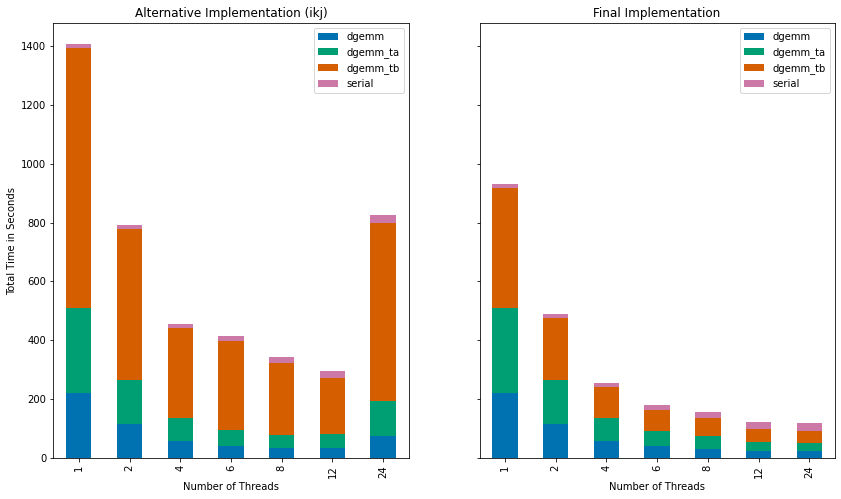

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,8),sharey=True)
z.plot.bar(stacked='True',ax=axes[0],title='Alternative Implementation (ikj)')
axes[0].set_xlabel('Number of Threads')
axes[1].set_xlabel('Number of Threads')
axes[0].set_ylabel('Total Time in Seconds')
x.plot.bar(stacked='True',ax=axes[1],title='Final Implementation')
fig.savefig('comparison2.png')

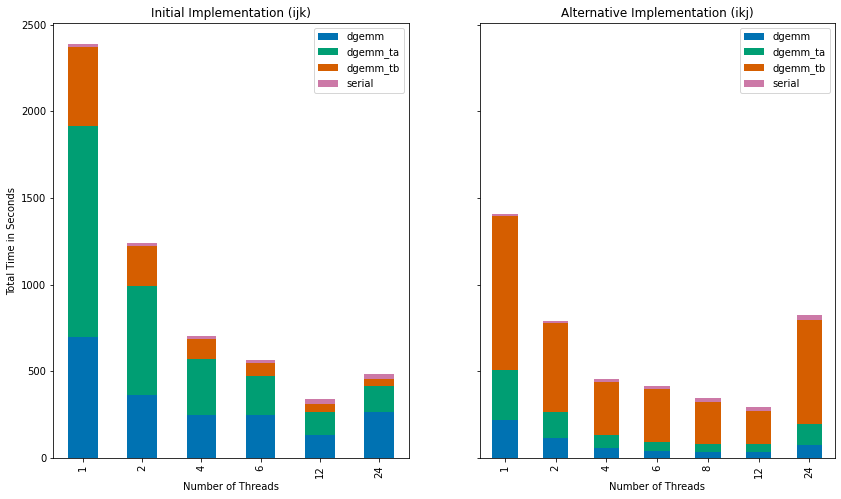

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,8),sharey=True)
y.plot.bar(stacked='True',ax=axes[0],title='Initial Implementation (ijk)')
axes[0].set_xlabel('Number of Threads')
axes[1].set_xlabel('Number of Threads')
axes[0].set_ylabel('Total Time in Seconds')
z.plot.bar(stacked='True',ax=axes[1],title='Alternative Implementation (ikj)')
fig.savefig('comparison.png')

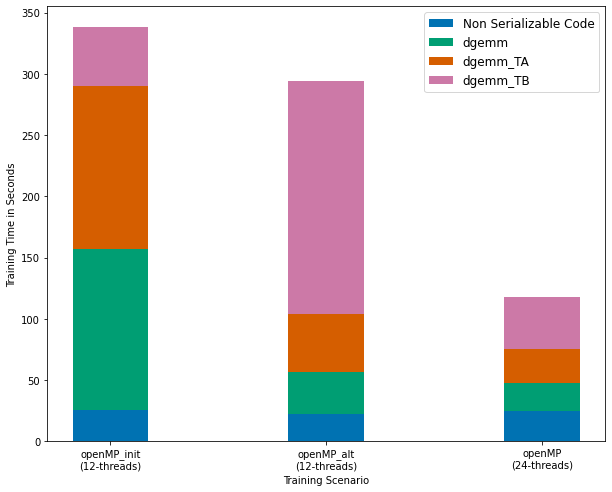

In [98]:
plt.style.use('seaborn-colorblind')
fig,ax = plt.subplots(figsize=(10,8))
width=0.35
labels_3 = labels[1:4]
totals_3 = totals[1:4]
dgemm_3 = dgemm[1:4]
dgemm_3_ta = dgemm_ta[1:4]
dgemm_3_tb = dgemm_tb[1:4]
ax.bar(labels_3, totals_3, width, label='Non Serializable Code')
ax.bar(labels_3, dgemm_3, width, label='dgemm',bottom=totals_3)
ax.bar(labels_3, dgemm_3_ta, width, label='dgemm_TA',bottom=[sum(x) for x in zip(totals_3,dgemm_3)])
ax.bar(labels_3, dgemm_3_tb, width, label='dgemm_TB',bottom=[sum(x) for x in zip(totals_3,dgemm_3,dgemm_3_ta)])
# ax.set_yscale('log')
plt.xlabel('Training Scenario')
plt.ylabel('Training Time in Seconds')
plt.legend(loc='best',fontsize='large')
plt.show()

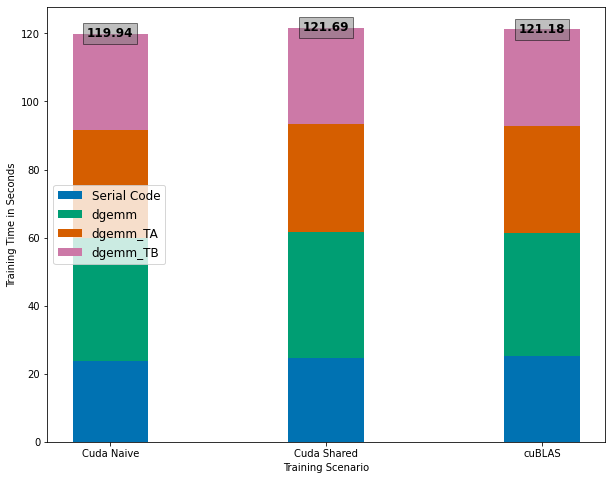

In [103]:
plt.style.use('seaborn-colorblind')
fig,ax = plt.subplots(figsize=(10,8))
width=0.35
labels_3 = labels[5:]
totals_3 = totals[5:]
dgemm_3 = dgemm[5:]
dgemm_3_ta = dgemm_ta[5:]
dgemm_3_tb = dgemm_tb[5:]
ax.bar(labels_3, totals_3, width, label='Serial Code')
ax.bar(labels_3, dgemm_3, width, label='dgemm',bottom=totals_3)
ax.bar(labels_3, dgemm_3_ta, width, label='dgemm_TA',bottom=[sum(x) for x in zip(totals_3,dgemm_3)])
ax.bar(labels_3, dgemm_3_tb, width, label='dgemm_TB',bottom=[sum(x) for x in zip(totals_3,dgemm_3,dgemm_3_ta)])
for i, v in enumerate(list(sum(x) for x in zip(totals_3,dgemm_3,dgemm_3_ta,dgemm_3_tb))):
    ax.text(i , v, str(round(v,2)), color='black', 
            fontweight='bold',fontsize=12,bbox=dict(facecolor='gray', alpha=0.5),
           horizontalalignment='center',
          verticalalignment='center')
# ax.set_yscale('log')
plt.xlabel('Training Scenario')
plt.ylabel('Training Time in Seconds')
plt.legend(loc='center left',fontsize='large')
plt.show()
